### Objective:  In this notebook, I am doing a grid search using SGDClassifier for elastic net

I will do the grid search using 10 fold CV on a subset of the training data. 

### Load modules and the data

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, make_scorer

import numpy as np
import pandas as pd
import seaborn as sns
from os.path import join, split
from os import listdir
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows',999)
pd.set_option('display.max_columns', 999)
%matplotlib inline


In [60]:
base = join('/Users/crivera5/Documents/NonIntuitProjects/Kaggle/KaggleEEG','data_local')
data= pd.read_csv(join(base,'cleaned_training.csv'))

X = data.iloc[:, :-3].copy()
y = data.iloc[:,-1].copy()

### Split the data into test and train


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=4)

### Set up the pipeline and fit the data

The pipeline below: 

1. scales the data, 
2. Trains a SDGlogistic regressor with GridSearchCV. 

I am trying 3 different parameters in my grid search: 

1. C: the tunning parameter. 
2. Class_weight: Toggling whether the regressor uses balanced or not balanced wieghting strategy to account for imbalances in the classes. 
3. penalty: 'L1' or 'L2'

In [24]:
# the space to search 
number_alpha= 100
start = -2
end = 2
ratios =  np.arange(0.05,1,0.05)
cv = 5
scalar = StandardScaler()

sgd_clf = SGDClassifier(loss='log', 
                       penalty='elasticnet', 
                       l1_ratio=0.15, 
                       fit_intercept=True, 
                       n_iter=20, 
                       shuffle=True, verbose=0,
                       n_jobs=1, random_state=444, 
                       learning_rate='optimal', 
                       power_t=0.5, class_weight=None, 
                       warm_start=True, 
                       average=False)

sgd_pipeline = Pipeline([('scalar',StandardScaler()),
                     ('SGDclf', sgd_clf)])
parameters = {'SGDclf__alpha':np.logspace(start,end,number_alpha), 'SGDclf__class_weight':[None, 'balanced'],   
              'SGDclf__l1_ratio':ratios}
sgd_model = GridSearchCV(sgd_pipeline, parameters, n_jobs = 3, scoring = 'roc_auc',verbose = True, cv = cv)
sgd_model

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SGDclf', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=20, n_jobs=1,
       penalty='elasticnet', power_t=0.5, random_state=444, shuffle=True,
       verbose=0, warm_start=True))]),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'SGDclf__class_weight': [None, 'balanced'], 'SGDclf__l1_ratio': array([ 0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,  0.95]), 'SGDclf__alpha': array([  1.00000e-02,   1.09750e-02, ...,   9.11163e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=True)

In [25]:
sgd_model.fit(X_train, y_train)

Fitting 5 folds for each of 3800 candidates, totalling 19000 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    4.5s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   20.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:   48.0s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:  1.5min
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:  2.4min
[Parallel(n_jobs=3)]: Done 1794 tasks      | elapsed:  3.5min
[Parallel(n_jobs=3)]: Done 2444 tasks      | elapsed:  4.7min
[Parallel(n_jobs=3)]: Done 3194 tasks      | elapsed:  6.1min
[Parallel(n_jobs=3)]: Done 4044 tasks      | elapsed:  7.7min
[Parallel(n_jobs=3)]: Done 4994 tasks      | elapsed:  9.4min
[Parallel(n_jobs=3)]: Done 6044 tasks      | elapsed: 11.4min
[Parallel(n_jobs=3)]: Done 7194 tasks      | elapsed: 13.6min
[Parallel(n_jobs=3)]: Done 8444 tasks      | elapsed: 16.0min
[Parallel(n_jobs=3)]: Done 9794 tasks      | elapsed: 18.4min
[Parallel(n_jobs=3)]: Done 11244 tasks      | elapsed: 21.0min
[Parallel(n_jobs=3)]: Done 12794 tasks      | elapsed: 23.7min
[Parallel(

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SGDclf', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=20, n_jobs=1,
       penalty='elasticnet', power_t=0.5, random_state=444, shuffle=True,
       verbose=0, warm_start=True))]),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'SGDclf__class_weight': [None, 'balanced'], 'SGDclf__l1_ratio': array([ 0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,  0.95]), 'SGDclf__alpha': array([  1.00000e-02,   1.09750e-02, ...,   9.11163e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=True)

In [26]:
# save the model
from sklearn.externals import joblib
filename = join(base,'SGDRegressionModel.joblib.pkl')
joblib.dump(sgd_model, filename, compress=3)

['/Users/crivera5/Documents/NonIntuitProjects/Kaggle/KaggleEEG/data_local/SGDRegressionModel.joblib.pkl']

### Get the best estimator of the bunch

Below I am getting the best model of the bunch. 

In [27]:
best_model  = sgd_model.best_estimator_

In [28]:
best_model.get_params()

{'SGDclf': SGDClassifier(alpha=0.01, average=False, class_weight='balanced', epsilon=0.1,
        eta0=0.0, fit_intercept=True, l1_ratio=0.45000000000000001,
        learning_rate='optimal', loss='log', n_iter=20, n_jobs=1,
        penalty='elasticnet', power_t=0.5, random_state=444, shuffle=True,
        verbose=0, warm_start=True),
 'SGDclf__alpha': 0.01,
 'SGDclf__average': False,
 'SGDclf__class_weight': 'balanced',
 'SGDclf__epsilon': 0.1,
 'SGDclf__eta0': 0.0,
 'SGDclf__fit_intercept': True,
 'SGDclf__l1_ratio': 0.45000000000000001,
 'SGDclf__learning_rate': 'optimal',
 'SGDclf__loss': 'log',
 'SGDclf__n_iter': 20,
 'SGDclf__n_jobs': 1,
 'SGDclf__penalty': 'elasticnet',
 'SGDclf__power_t': 0.5,
 'SGDclf__random_state': 444,
 'SGDclf__shuffle': True,
 'SGDclf__verbose': 0,
 'SGDclf__warm_start': True,
 'scalar': StandardScaler(copy=True, with_mean=True, with_std=True),
 'scalar__copy': True,
 'scalar__with_mean': True,
 'scalar__with_std': True,
 'steps': [('scalar',
   StandardSc

### Plot an ROC curve

In [29]:
def plot_roc_curves(model_data, lw = 0.8):
    '''plots an roc curve
    Parameters: 
        model_data: dicts obs and probs
        classifier
    Returns: 
        None
    '''
    for model in model_data:
        print model
        obs = model_data[model]['obs']
        probs = model_data[model]['probs']
        fpr, tpr, _= roc_curve(obs, probs)
        
        plt.plot(fpr, tpr,label = model, lw=lw)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curves')
    plt.legend(loc = 0)
    
    return None

In [30]:
probs = [pred[1] for pred in best_model.predict_proba(X_test)]
model_data = {'Best L1 Logistic Regression': {'obs':y_test,
                                              'probs': probs}}

Best L1 Logistic Regression


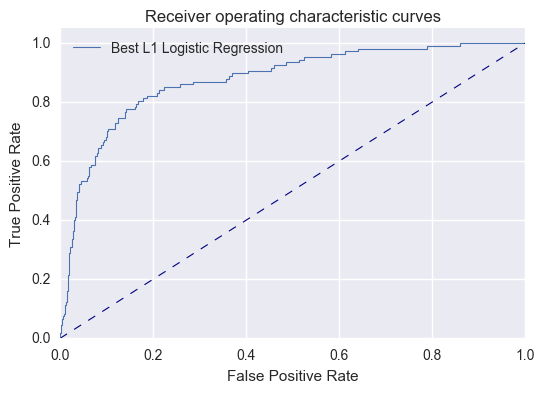

In [31]:
plot_roc_curves(model_data)

In [32]:
roc_auc_score(y_test, probs)

0.87740207917672997

## Retrain the best model with all of the data

In [33]:
best_model.fit(X,y)

Pipeline(steps=[('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SGDclf', SGDClassifier(alpha=0.01, average=False, class_weight='balanced', epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.45000000000000001,
       learning_rate='optimal', loss='log', n_iter=20, n_jobs=1,
       penalty='elasticnet', power_t=0.5, random_state=444, shuffle=True,
       verbose=0, warm_start=True))])

### Plot the Coeffecients

In [42]:
coefs =pd.Series(best_model.get_params()['SGDclf'].coef_.tolist()[0])
coefs =pd.Series(best_model.get_params()['SGDclf'].coef_.tolist()[0])
coefs.index = X_test.columns
coefs = coefs[coefs!=0]

coefs.sort_values(inplace = True)

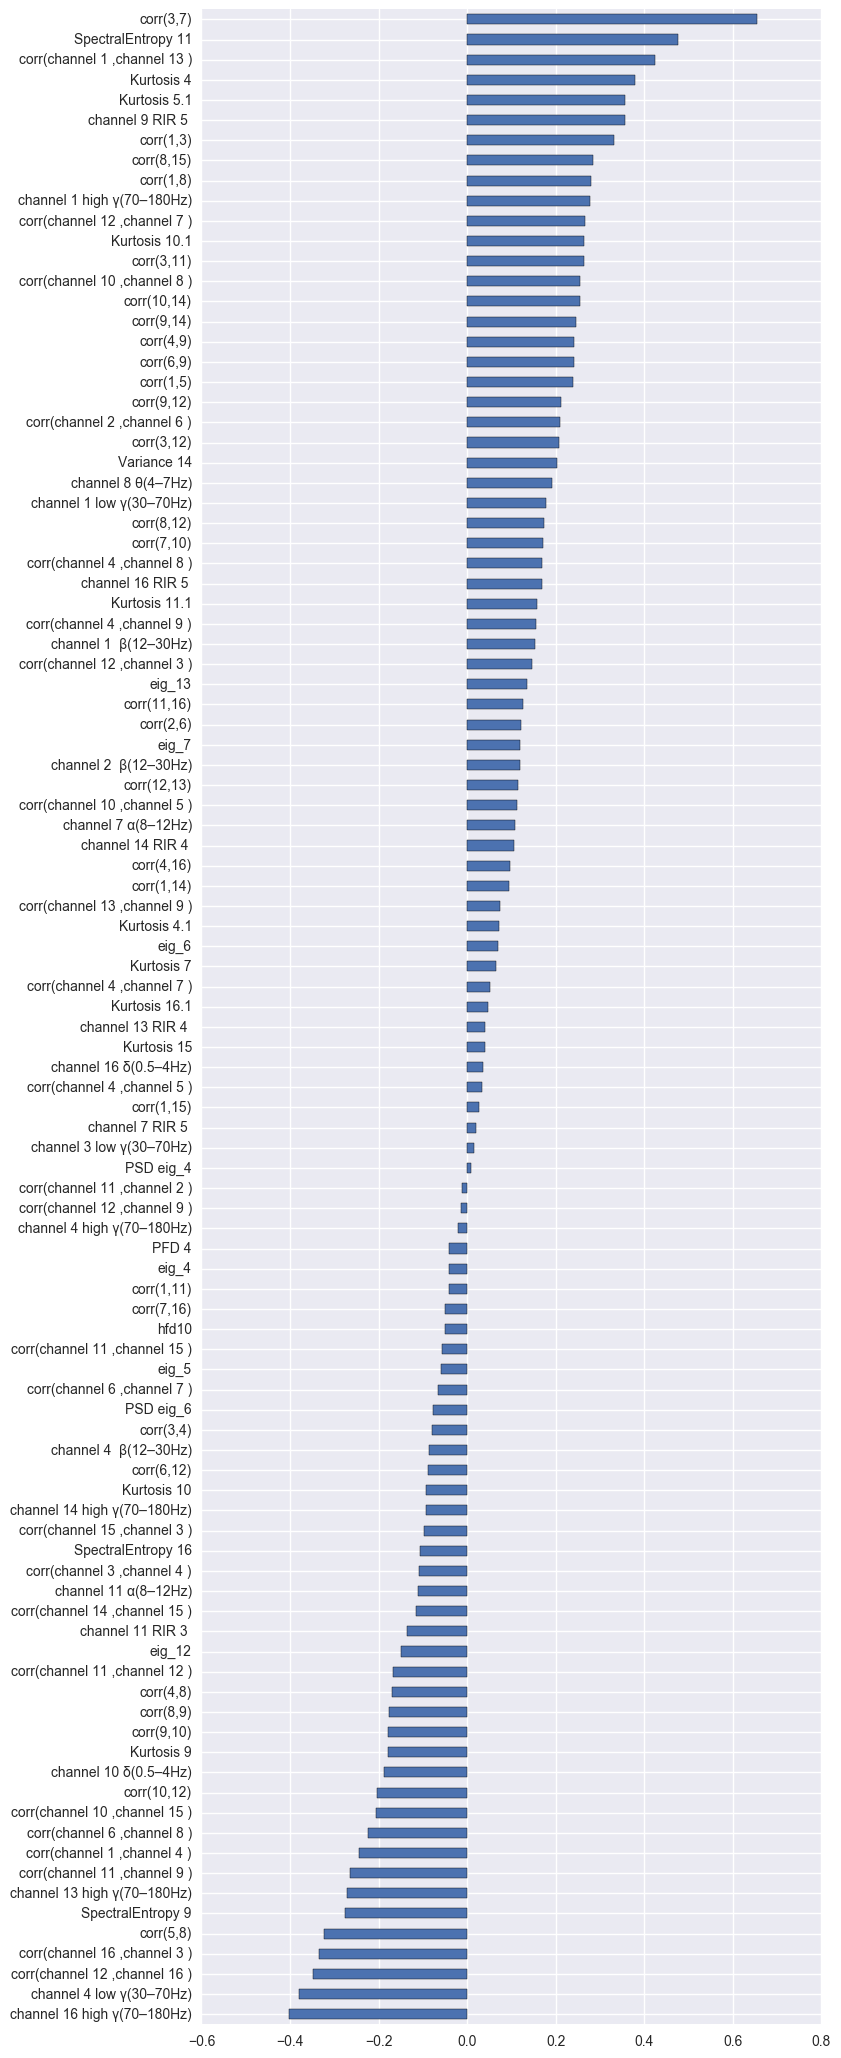

In [43]:
coefs.plot.barh(figsize= (8,26))

In [44]:
len(coefs)

100

### Predict the test data

In [45]:
def load_features(path):
    """loads the features of the data and removes undesired columns """
    
    remove = ['channel 4 RIR 1 ', 'channel 4 RIR 2 ', 'channel 4 RIR 3 ', 'channel 4 RIR 4 ', 'channel 4 RIR 5 ',
              'channel 4 RIR 6 ', 'channel 10 RIR 1 ', 'channel 10 RIR 2 ', 'channel 10 RIR 3 ', 'channel 10 RIR 4 ',
              'channel 10 RIR 5 ', 'channel 10 RIR 6 ', 'SpectralEntropy 4', 'SpectralEntropy 10']
    
    # read in the data 
    data =pd.read_csv(path)
        
    # drop the undesired columns 
    return data.drop(remove, axis = 1)


test_data = load_features(join(base,'testing.csv'))

In [46]:
X_testing = test_data.iloc[:,:-1].copy()
file_names = test_data['filename'].copy()

In [47]:
# There are Nan's so fill them
X_testing =X_testing.fillna(X_testing.mean(),axis = 0)

In [48]:
predictions = [pred[1] for pred in best_model.predict_proba(X_testing)]

In [49]:
submission = pd.DataFrame({'File':file_names, 'Class': predictions})
submission = submission[['File','Class']]

In [50]:
submission.head()

,File,Class
0,new_1_1.mat,0.237390
1,new_1_10.mat,0.792401
2,new_1_100.mat,0.990540
3,new_1_101.mat,0.599656
4,new_1_102.mat,0.185419


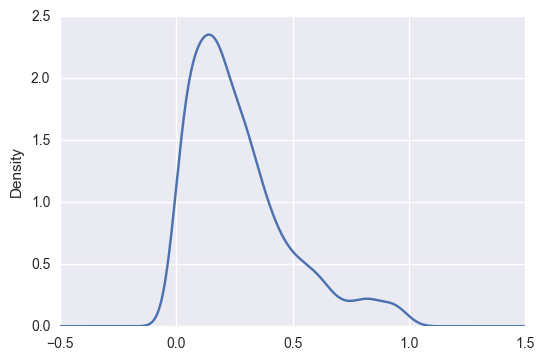

In [51]:
submission.Class.plot.density()

It seems to me that the first ones are more likely to be preictal. 

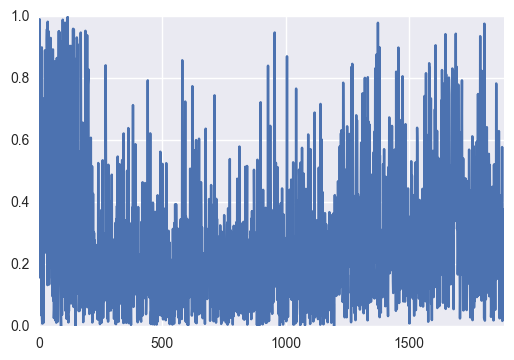

In [52]:
submission.Class.plot()

In [53]:
len(submission)

1888

### Get files not in the data
The problem with this is that i did not have all the files. 

In [54]:
base2 = join('/Users/crivera5/Documents/NonIntuitProjects/Kaggle/KaggleEEG')
paths = [join(base2, 'test_1_new'), 
         join(base2,'test_2_new'),
         join(base2,'test_3_new')]

In [55]:
def get_data_files(list_o_paths):
    """This gets the data matlab files"""
    file_names = []
    for path in list_o_paths:
        files = [join(path, f) for f in listdir(path) if f.endswith('.mat')]
        file_names.extend(files)

    return file_names

In [56]:
unscored_files = [split(f)[1] for f in get_data_files(paths)]
unscored_files = [f for f in unscored_files if f not in list(submission['File'])]
unscored_files =pd.DataFrame({'File':unscored_files})
unscored_files['Class'] = submission.Class.mean()
unscored_files.head()

,File,Class
0,new_1_13.mat,0.270601
1,new_1_147.mat,0.270601
2,new_1_167.mat,0.270601
3,new_1_177.mat,0.270601
4,new_1_18.mat,0.270601


In [57]:
# merge them 
submission = pd.concat([submission, unscored_files])
submission.sort_values('File', inplace = True)

In [58]:
print len(submission)
submission.head()


1908


,File,Class
0,new_1_1.mat,0.237390
1,new_1_10.mat,0.792401
2,new_1_100.mat,0.990540
3,new_1_101.mat,0.599656
4,new_1_102.mat,0.185419


In [59]:
submission.to_csv(join(base,'submission2.csv'), index = False)